In [1]:
#import
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

from myData import Data
dataObject = Data()
#clsifiers
from sklearn import tree
from IPython.display import Image
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#plot
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline.offline import matplotlib

import numpy as np

In [2]:
seasonA = ' \'2013/2014\' '
seasonB = ' \'2014/2015\' '
seasonC = ' \'2015/2016\' '
season = '('+seasonA +','+ seasonB +','+ seasonC+')'

LeicesterCity = 8197
ManchesterCity = 8456
Barcelona = 8634
Arsenal = 9825 # Ganados: 20 Enpatados: 11 Perdidos: 7
Chelsea = 8455 # tiene las clases mas balanceadas 12,14,12
teamApiId = Arsenal

In [3]:
#SQL query
teamName = dataObject.getTeamName(teamApiId)
matches = dataObject.getMatchesFromDataBase(teamApiId , season)
numberOfMatches = len(matches)
print "Cantidad de partido: ", numberOfMatches
# mostrar tabla grafica

 SELECT team_long_name FROM Team WHERE team_api_id=9825
 SELECT * FROM Match WHERE( home_team_api_id = 9825 OR away_team_api_id = 9825 ) AND season IN ( '2013/2014' , '2014/2015' , '2015/2016' ) ORDER BY season, stage
Cantidad de partido:  114


In [4]:
#ETL
posPossesionAverage = dataObject.getPossesionAverage(matches, teamApiId)
numberOfFoulCommit = dataObject.getNumberOfFoulCommit(matches, teamApiId)
numberOfShotOn = dataObject.getNumberOfShotOn(matches, teamApiId)
yellowCards = dataObject.getNumberOfCards(matches, teamApiId, 'y')
corners = dataObject.getNumberOfCorner(matches, teamApiId)
crosses = dataObject.getNumberOfCross(matches, teamApiId)
matchResultColor = dataObject.getMatchResultColor(matches, teamApiId)
matchResultNumber = dataObject.getMatchResultNumber(matches, teamApiId)


In [5]:
#preparear datos
feature_names = ['Corners','Foules', 'Tiros al arco']
X = np.column_stack((crosses,numberOfFoulCommit, numberOfShotOn))
print feature_names
print X
print X.shape
Y = matchResultNumber
class_names = ["Perdio" ,"Empato" , "Gano"]

['Corners', 'Foules', 'Tiros al arco']
[[22 15  9]
 [23  7  8]
 [10 14  6]
 [27  8  9]
 [12  8  9]
 [11 10  3]
 [23 11  4]
 [28  9  8]
 [19  8  4]
 [18  9  7]
 [29 12  5]
 [19 10  2]
 [14 10  6]
 [25  8 10]
 [19 13  7]
 [29  6  4]
 [24  8  5]
 [34  6 19]
 [18  8  5]
 [40  6 13]
 [16  9  4]
 [20  6 12]
 [19  4  2]
 [15  9  5]
 [18 13  6]
 [25 11 11]
 [15  9  6]
 [22 10  6]
 [39 11  5]
 [ 9 11  2]
 [10  7  8]
 [27  8  3]
 [20  6  8]
 [17 15  6]
 [ 8  6  5]
 [31 10  5]
 [27 10  5]
 [17  5  8]
 [32 12  7]
 [17 18  4]
 [36  5 16]
 [22  8  4]
 [13 10  4]
 [30  8 15]
 [14 10  3]
 [15  7 13]
 [21  8  5]
 [28  5 18]
 [19 16  6]
 [15 12 13]
 [13 10 10]
 [25  7 10]
 [15 16  7]
 [13 14  3]
 [ 7 14  4]
 [ 8  6  5]
 [10 13 14]
 [26  7  7]
 [11 11  4]
 [ 7  6  2]
 [14  6  3]
 [14 12  4]
 [ 5 13 10]
 [ 6 14  7]
 [22 12  7]
 [20  9 11]
 [29 10  8]
 [13  7  3]
 [14  7  6]
 [13  7  9]
 [32  6 17]
 [25 17  4]
 [14 11 13]
 [22  7 20]
 [14  8  4]
 [ 7  6 11]
 [28 12 15]
 [17 12 14]
 [20  2 10]
 [12  8 16]
 

Guardando PDF...


<IPython.core.display.Javascript object>


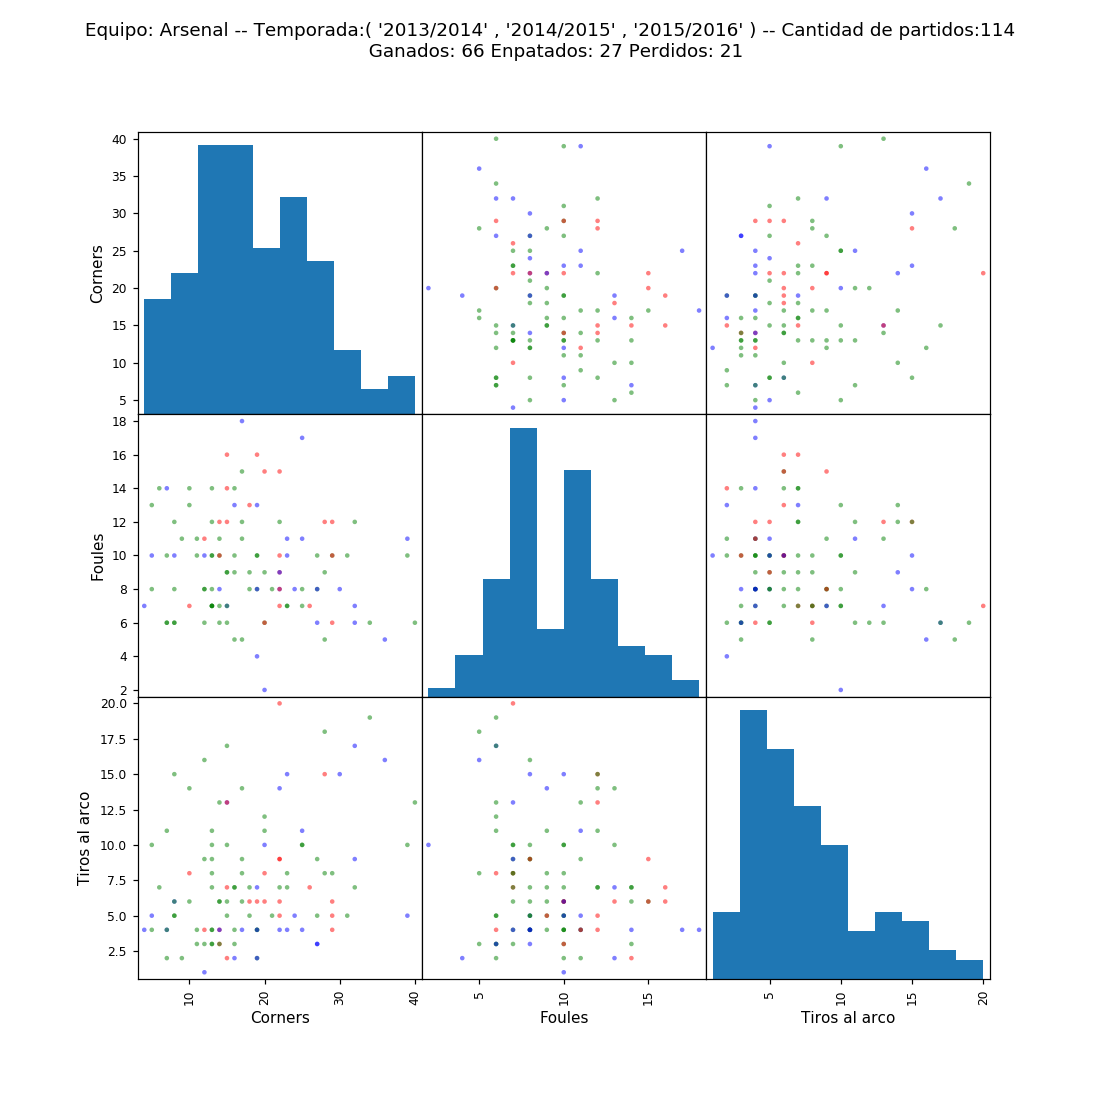

In [6]:
numberOfWinTieLose = dataObject.getNumberOfWinTieLose(matches,teamApiId)
win = str(numberOfWinTieLose[0])
tie = str(numberOfWinTieLose[1])
lose = str(numberOfWinTieLose[2])
title = 'Equipo: ' + teamName + ' -- Temporada:' + season + ' -- Cantidad de partidos:' + str(numberOfMatches) \
        + '\n  Ganados: ' + win + ' Enpatados: ' + tie + ' Perdidos: ' + lose
    
print "Guardando PDF..."
df = pd.DataFrame(X, columns=feature_names)
# Doc: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot
scatter_matrix(df, figsize=(10, 10), diagonal='hist', color=matchResultColor)
plt.suptitle(title)
plt.show()
